In [6]:
import numpy as np
import random
from pymoo.core.problem import Problem
from pymoo.problems import get_problem
from pymoo.util.plotting import plot
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize


Generation       50 | Population Elite Points:      397 | Zitlerd: 0.8509 | Spa: 0.0171 | Hrs: 0.8667 | Gdplus: 0.3676 | Igdplus: 0.3278 | Hv: 0.2263
Generation      100 | Population Elite Points:      819 | Zitlerd: 0.9417 | Spa: 0.0101 | Hrs: 0.8957 | Gdplus: 0.0383 | Igdplus: 0.0361 | Hv: 0.6050
Generation      150 | Population Elite Points:     1265 | Zitlerd: 0.9888 | Spa: 0.0092 | Hrs: 0.8972 | Gdplus: 0.0049 | Igdplus: 0.0046 | Hv: 0.6578
Generation      200 | Population Elite Points:     1907 | Zitlerd: 1.0209 | Spa: 0.0059 | Hrs: 0.8956 | Gdplus: 0.0030 | Igdplus: 0.0020 | Hv: 0.6629


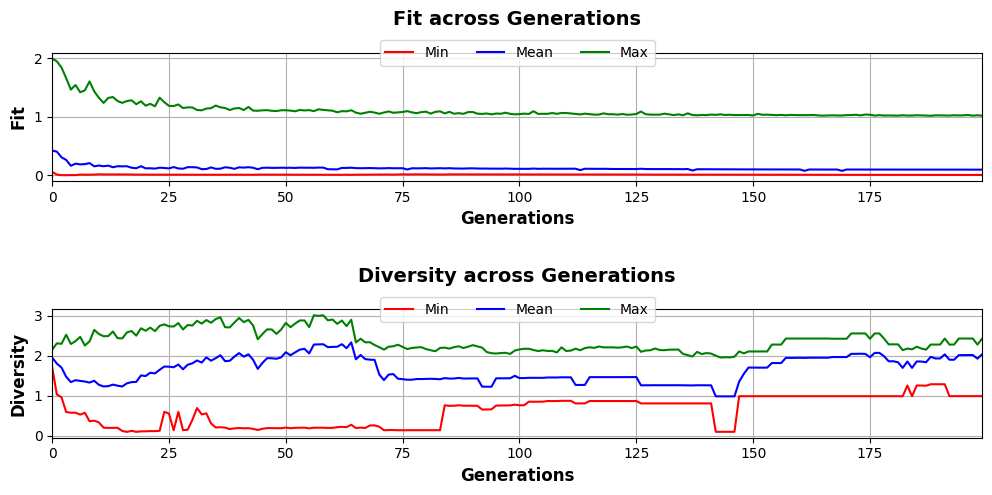

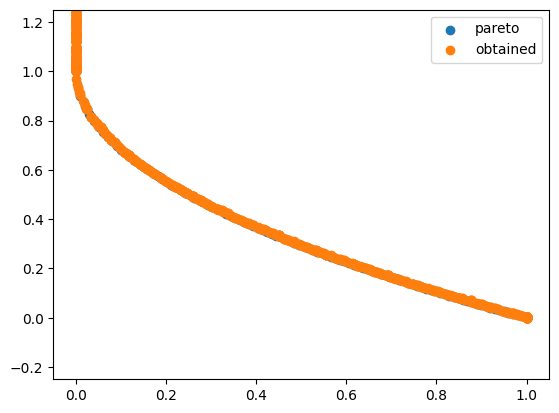

In [1]:
from src.multi_evolutive import RealMultiEvolutive
from pymoo.problems import get_problem
from pymoo.util.plotting import plot
import matplotlib.pyplot as plt
import numpy as np
from src.evaluation import MultiObjectiveEvaluation
problem = get_problem("zdt1")
evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    problem=problem,
    reference_point=(1., 1.),
    # limits=[[0, 1], [0, 1]]
)
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.9,
    average_mutation_rate=1.25,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.2,
    T_selection=6,
    evaluation_metrics=evaluation
)

results = evolutive.evolve(fit=problem.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()

fig, axs = plt.subplots(1, 1)
axs.set_ylim(-0.25, 1.25)
pareto = problem.pareto_front()
axs.scatter(pareto[:, 0], pareto[:, 1], label='pareto')
fit_scores = np.array([problem.evaluate(p) for p in results["best"]])

axs.scatter(fit_scores[:, 0], fit_scores[:, 1], label='obtained')
plt.legend()
# plot(problem.evaluate(results["best"]))


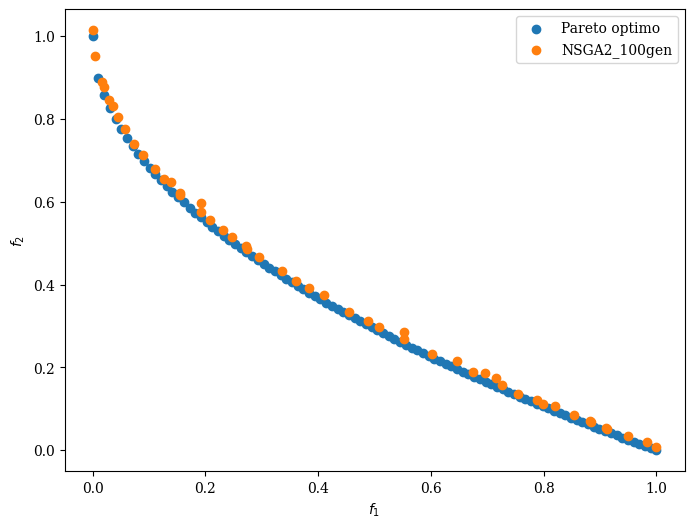

In [5]:
scatter = Scatter()

algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)
scatter.add(problem.pareto_front(), label="Pareto optimo")
scatter.add(res.F, label="NSGA2_100gen")
scatter.legend=True
scatter.show()

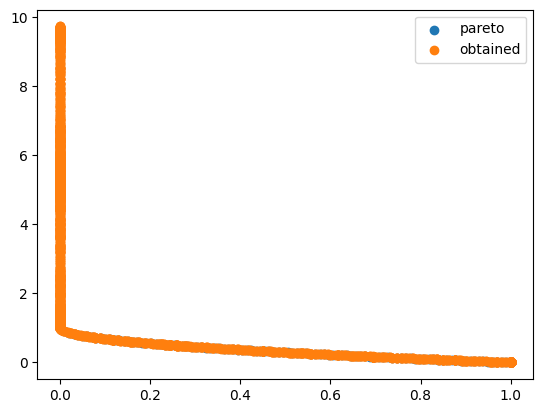

In [2]:
fig, axs = plt.subplots(1, 1)
pareto = problem.pareto_front()
axs.scatter(pareto[:, 0], pareto[:, 1], label='pareto')
fit_scores = np.array([problem.evaluate(p) for p in results["best"]])

axs.scatter(fit_scores[:, 0], fit_scores[:, 1], label='obtained')
plt.legend()

Generation      100 | Population Elite Points:     1076 | Best Fit: 1.0315 | Mean Fit: 0.0057
Generation      200 | Population Elite Points:     1888 | Best Fit: 1.0260 | Mean Fit: 0.0033


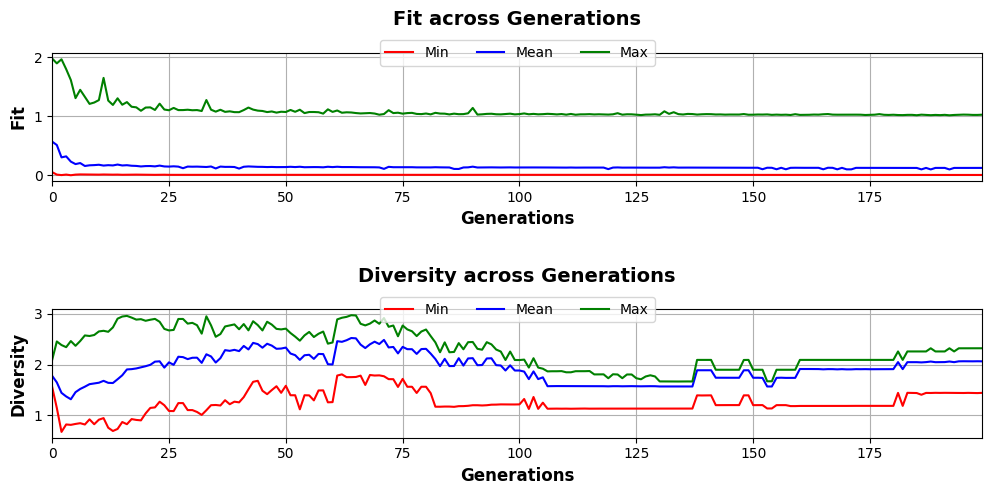

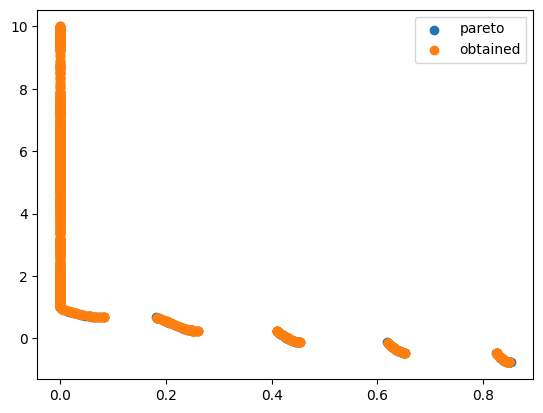

In [3]:
problem = get_problem("zdt3")
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.8,
    average_mutation_rate=1.5,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.6,
    T_selection=10
)

results = evolutive.evolve(fit=problem.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()

fig, axs = plt.subplots(1, 1)
# axs.set_ylim(-1.5, 1.5)
pareto = problem.pareto_front()
axs.scatter(pareto[:, 0], pareto[:, 1], label='pareto')
fit_scores = np.array([problem.evaluate(p) for p in results["best"]])

axs.scatter(fit_scores[:, 0], fit_scores[:, 1], label='obtained')
plt.legend()

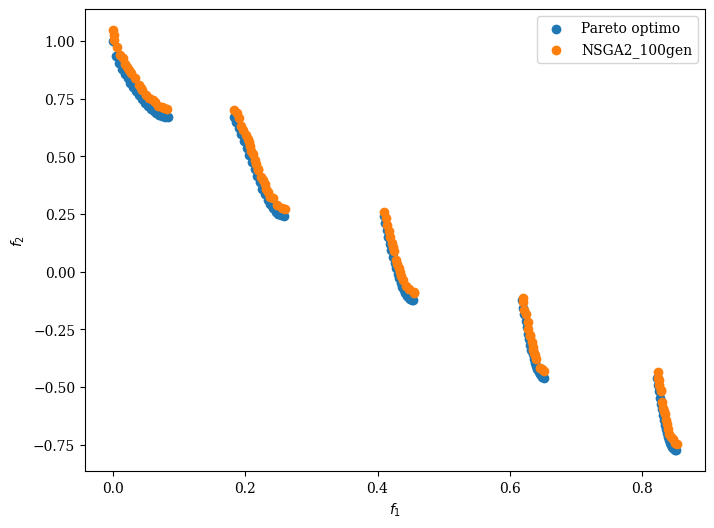

In [ ]:
scatter = Scatter()

algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)
scatter.add(problem.pareto_front(), label="Pareto optimo")
scatter.add(res.F, label="NSGA2_100gen")
scatter.legend=True
scatter.show()

In [ ]:
problem = get_problem("mw7")
evolutive = RealMultiEvolutive(
    n_individuals=100,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front_type='range',
    niche_type='sharing',
    selection_pool_size=0.6,
    average_mutation_rate=1.,
    mutation_eps=0.05,
    elitism=True,
    alpha=0.1,
    T_selection=4
)
results = evolutive.evolve(fit=problem.evaluate, n_generations=300, trace=100, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()

fig, axs = plt.subplots(1, 1)
# axs.set_ylim(-0.25, 1.25)
pareto = problem.pareto_front()
axs.scatter(pareto[:, 0], pareto[:, 1], label='pareto')
fit_scores = np.array([problem.evaluate(p) for p in results["best"]])

axs.scatter(fit_scores[:, 0], fit_scores[:, 1], label='obtained')
plt.legend()

In [ ]:
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
problem = get_problem("mw14").pareto_front()
Scatter(angle=(45,45)).add(problem, color="red").show()

In [7]:
class TSPProblem(Problem):
    def __init__(self, n_cities, seed=50):
        # Define the number of variables (cities) and objectives (time and distance)
        super().__init__(n_var=n_cities, n_obj=2, n_constr=0, xl=0, xu=1)
        
        # Initialize the random seed for reproducibility
        if seed is not None:
            np.random.seed(seed)
        
        # Generate random distances and times between cities
        self.distances = np.random.uniform(0, 100, size=(n_cities, n_cities))
        self.distances = (self.distances + self.distances.T) / 2
        self.times = np.random.uniform(0, 300, size=(n_cities, n_cities))
        random.seed(None)
        
        # Ensure the diagonal is zero (distance/time from a city to itself is zero)
        np.fill_diagonal(self.distances, 0)
        np.fill_diagonal(self.times, 0)

    def _evaluate(self, x, out, *args, **kwargs):
        # Calculate the total distance and time for each solution in x
        distances = []
        times = []
        
        for route in x:
            perm = np.argsort(route)
            total_distance = 0
            total_time = 0
            
            for i in range(len(perm) - 1):
                total_distance += self.distances[perm[i], perm[i+1]]
                total_time += self.times[perm[i], perm[i+1]]
            
            # Add distance and time from last city back to the first city
            total_distance += self.distances[perm[-1], perm[0]]
            total_time += self.times[perm[-1], perm[0]]
            
            distances.append(total_distance)
            times.append(total_time)
        
        out["F"] = np.column_stack([distances, times])

Comprobación del funcionamiento del algoritmo NSGA2 para las funciones continuas

In [ ]:
problem = get_problem("mw14", n_var = 30)
print(problem.n_var)
print(problem.n_obj)
print(problem.xl)
print(problem.xu)


In [11]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

In [ ]:
scatter = Scatter()
scatter.add(problem.pareto_front(), label="Pareto optimo")
scatter.add(res.F, label="NSGA2_100gen")
scatter.legend=True
scatter.show()

Comprobación del funcionamiento del algoritmo NSGA2 para el TSPMO

In [8]:
problem = TSPProblem(100)
print(np.shape(problem.distances))
print(np.shape(problem.times))

(100, 100)
(100, 100)


In [9]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 10),
               verbose=False)
res2 = minimize(problem,
               algorithm,
               ('n_gen', 1000),
               verbose=False)

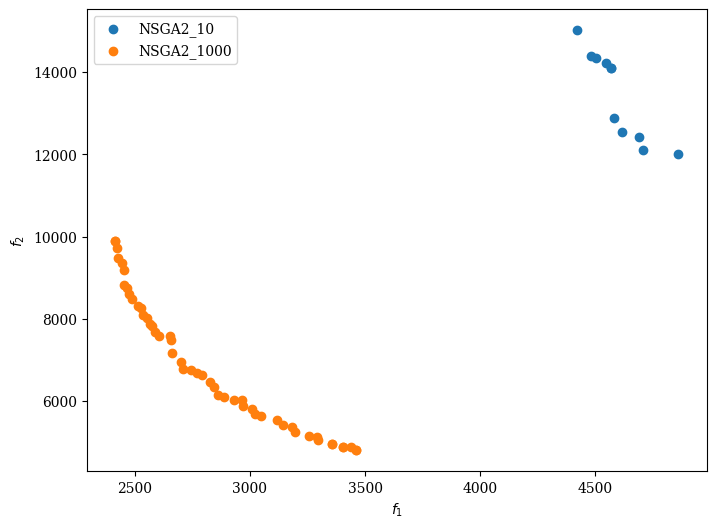

In [30]:
scatter = Scatter()
scatter.add(res.F, label="NSGA2_10")
scatter.add(res2.F, label="NSGA2_1000")
scatter.legend=True
scatter.show()


Generation      400 | Population Elite Points:      285 | Best Fit: 1.2076 | Mean Fit: 0.0172
Generation      800 | Population Elite Points:      896 | Best Fit: 1.0935 | Mean Fit: 0.0061
Generation     1200 | Population Elite Points:     1525 | Best Fit: 1.0370 | Mean Fit: 0.0027
Generation     1600 | Population Elite Points:     1386 | Best Fit: 1.0488 | Mean Fit: 0.0038
Generation     2000 | Population Elite Points:     1863 | Best Fit: 1.0305 | Mean Fit: 0.0028


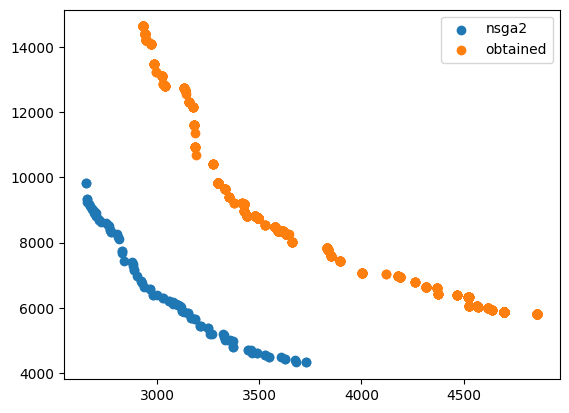

In [15]:
from src.multi_evolutive import PermutationMultiEvolutive
import matplotlib.pyplot as plt

evolutive = PermutationMultiEvolutive(
    alphabet=range(100),
    n_individuals=50,
    mutation=["to-opt", "insert-gene", "swap-gene"],
    crossover= ["uniform", "split-merge"],
    front='front',
    penalization='crowding_norm',
    selection_pool=['best', 'section'],
	T_selection=20,
	p_crossover=0.7,
	average_mutation_rate=1.25,
    maximize=[False, False],
    selection_pool_size=1.5,
	elitism=True
)
results = evolutive.evolve(fit=problem.evaluate, n_generations=2000, trace=400, obtain_metrics=True)
fig, axs = plt.subplots(1, 1)
axs.scatter(res2.F[:, 0], res2.F[:, 1], label='nsga2')
fit_scores = np.array([problem.evaluate(p) for p in results["best"]])

axs.scatter(fit_scores[:, 0], fit_scores[:, 1], label='obtained')
plt.legend()

In [2]:
from src.multi_evolutive import RealMultiEvolutive
import matplotlib.pyplot as plt
import numpy as np

evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=100,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha", "split-merge"],
    front='front',
    penalization='crowding_norm',
    selection_pool=['best', 'section'], # , ('best', 4)],
    selection_pool_size=1.,
    average_mutation_rate=1.,
    mutation_eps=.5,
    elitism=True,
    alpha=0.6,
    T_selection=10
)
results = evolutive.evolve(fit=problem.evaluate, n_generations=2000, trace=500, obtain_metrics=True)
fig, axs = plt.subplots(1, 1)
axs.scatter(res2.F[:, 0], res2.F[:, 1], label='nsga2')
fit_scores = np.array([problem.evaluate(p) for p in results["best"]])

axs.scatter(fit_scores[:, 0], fit_scores[:, 1], label='obtained')
plt.legend()

AssertionError: Input dimension 100 are not equal to n_var 30!